In [24]:
import torch
from torchvision.models import resnet18
import matplotlib.pyplot as plt
plt.style.use("dark_background")

from network_profile import log_memory, t_profile_net
%matplotlib inline

## Profile

In [25]:
model = resnet18().cuda()
inp = torch.randn(32, 3, 112, 112).cuda()

### Computation profiling

In [26]:
data = t_profile_net(model, inp)

In [27]:
data.head()

,layer,fw_operation,forward_time,forward_effi,bw_operation,backward_time,backward_effi,bw_time/fw_time,input_size,output_size
0,Conv2d,944111616,292.864006,3.223720e+06,1888223232,749.086914,2.520700e+06,2.557798,"(32, 3, 112, 112)","(32, 64, 56, 56)"
1,BatchNorm2d,6422528,165.408020,3.882840e+04,6422528,691.232422,9.291416e+03,4.178953,"(32, 64, 56, 56)","(32, 64, 56, 56)"
2,ReLU,6422528,165.216064,3.887351e+04,6422528,168.960938,3.801191e+04,1.022667,"(32, 64, 56, 56)","(32, 64, 56, 56)"
3,MaxPool2d,6422528,172.031982,3.733334e+04,6422528,690.175781,9.305641e+03,4.011904,"(32, 64, 56, 56)","(32, 64, 28, 28)"
4,Conv2d,924844032,180.672119,5.118908e+06,1849688064,1771.519531,1.044125e+06,9.805163,"(32, 64, 28, 28)","(32, 64, 28, 28)"


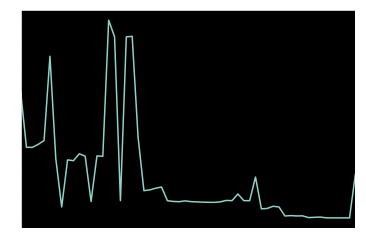

In [28]:
# Plot the percentage of fwd time spent in each layer
times_fwd = data["forward_time"] / data["forward_time"].sum() *100
times_fwd.plot()

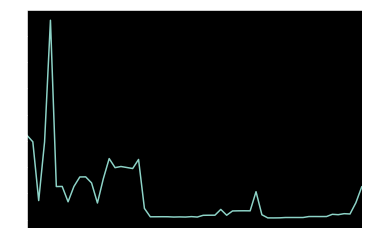

In [29]:
# Plot the percentage of bwd time spent in each layer
times_bwd = data["backward_time"] / data["backward_time"].sum() *100
times_bwd.plot()

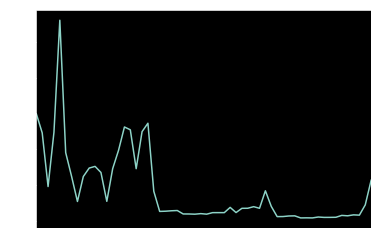

In [30]:
# Plot the percentage of total time spent in each layer
tot_time = data["backward_time"].sum() + data["forward_time"].sum()
times = (data["backward_time"] + data["forward_time"]) / tot_time
times.plot()

### Memory profiling

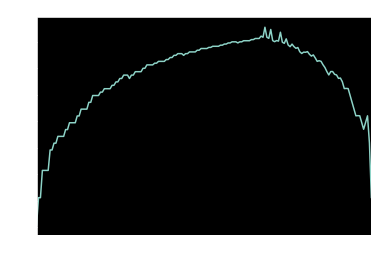

In [31]:
mem = log_memory(model, inp)
mem["mem_all"].plot()